In [20]:
%pip install tensorflow tflite_runtime
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 9.2 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt
from test_utils import *

2024-04-09 12:18:11.902403: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 12:18:12.499317: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
MODEL = './tflite_model/model.tflite'
TEST = './test/test.jpg'
WIDTH = 360
HEIGHT = 640

interpreter = tf.lite.Interpreter(model_path=MODEL)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [4]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [5]:
input_shape = input_details[0]['shape']
input_shape

array([  1, 360, 640,   1], dtype=int32)

In [6]:
img = cv2.imread(TEST)
target = cv2.resize(img, (1920, 1080))
img.shape

(360, 640, 3)

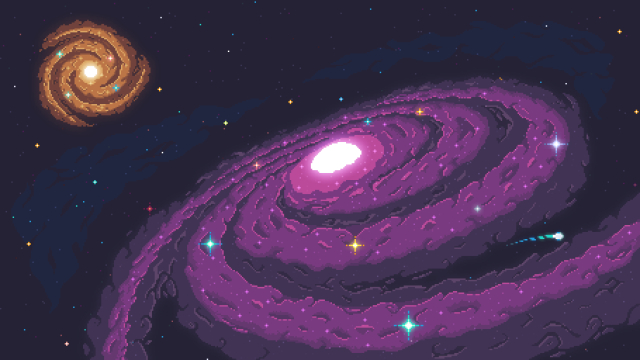

In [7]:
img2 = img[:,:,::-1]
display(Image.fromarray(img2))

In [8]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pil_img = Image.fromarray(img)
(y, cb, cr) = convert_to_yCbCr(pil_img)
y = y[:, :, np.newaxis]
y = y[np.newaxis, :, :, :]
y.shape

(1, 360, 640, 1)

In [9]:
interpreter.set_tensor(input_details[0]['index'], y)
interpreter.invoke()
output_img = interpreter.get_tensor(output_details[0]['index'])[0]
output_img.shape

(1080, 1920, 1)

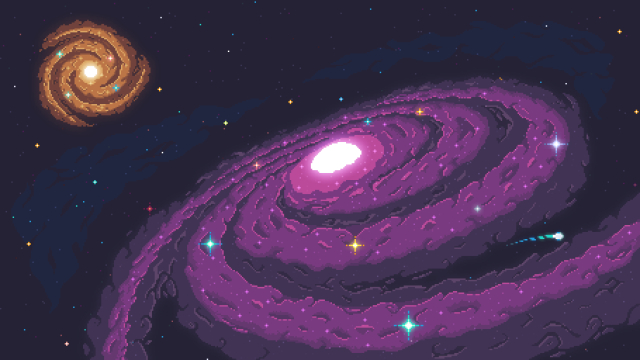

In [10]:
img = cv2.imread(TEST)
img2 = img[:,:,::-1]
display(Image.fromarray(img2))

2024-04-09 12:20:30.001733: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 12:20:30.003207: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-09 12:20:30.003365: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

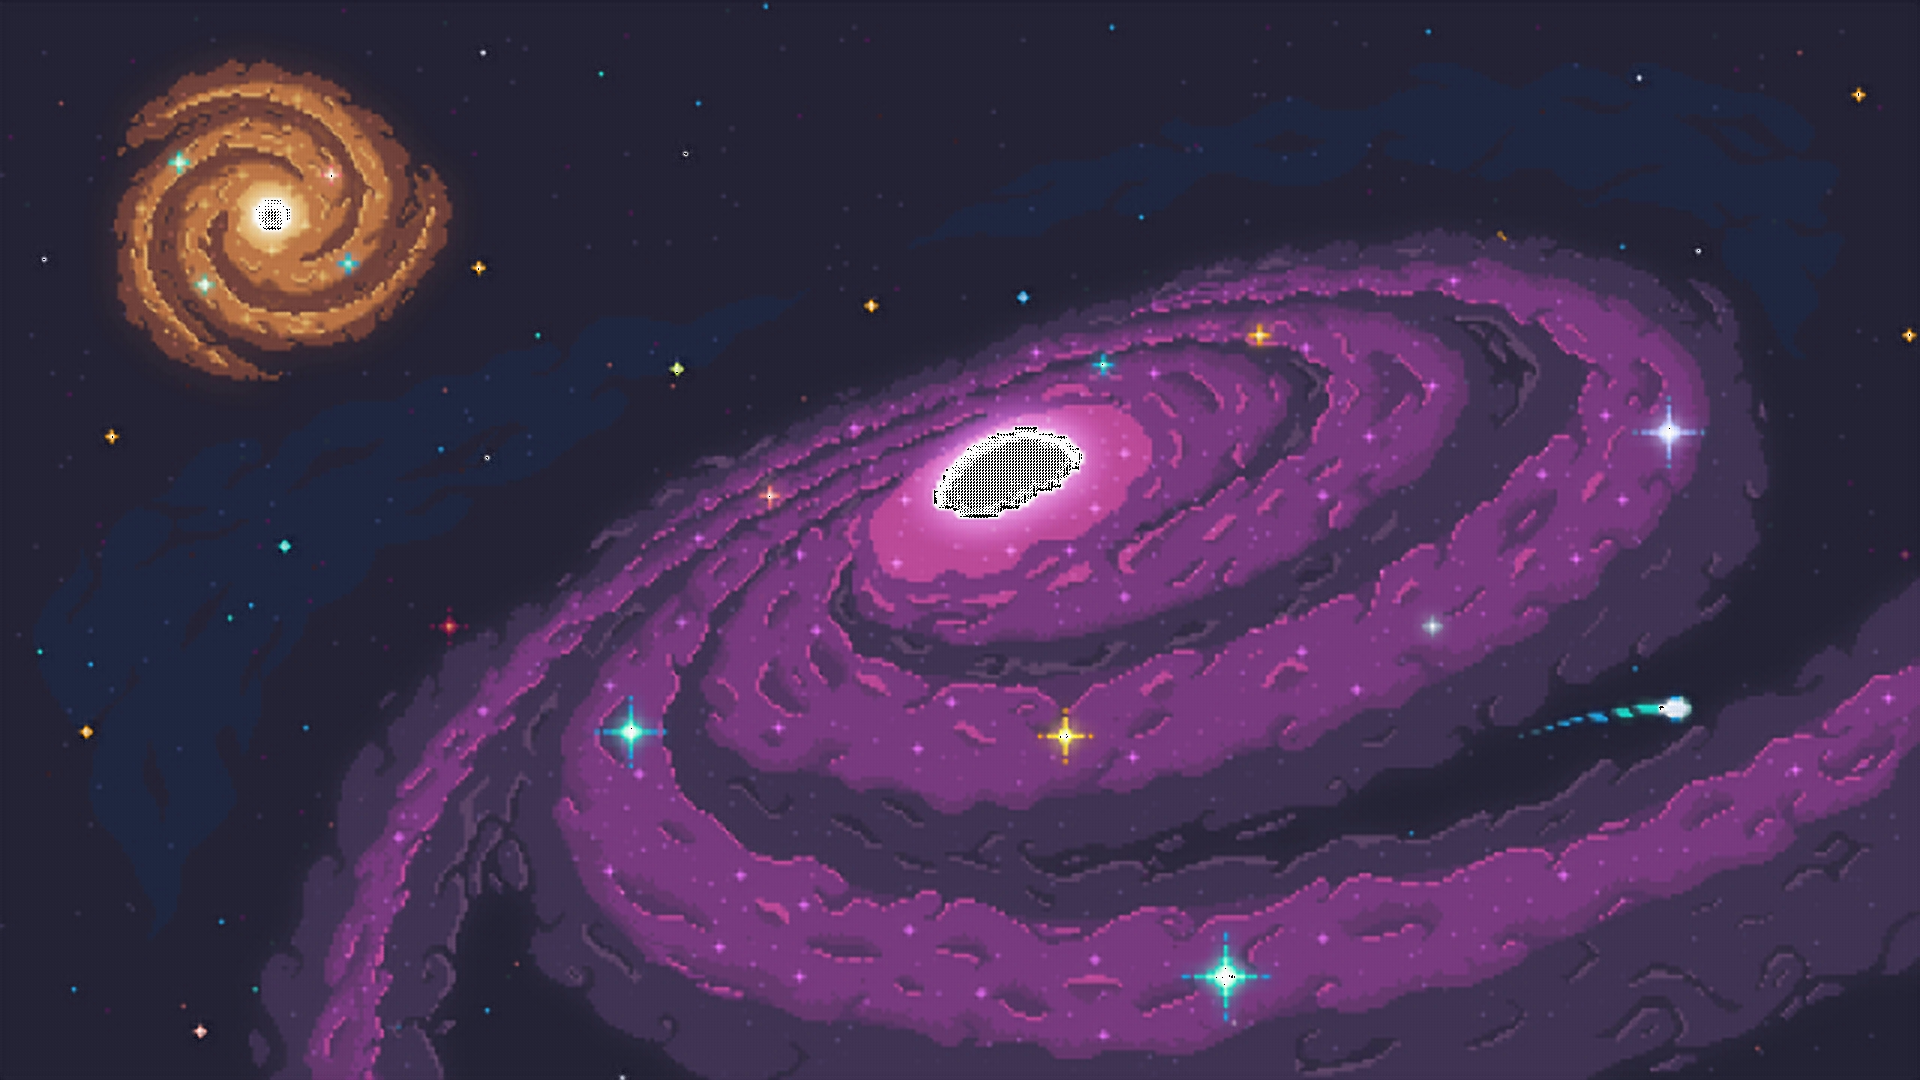

In [11]:
finalOutput = postprocess_image(output_img, cb, cr)
inference = np.array(finalOutput)
# img2 = inference[:,:,::-1]
display(Image.fromarray(inference))

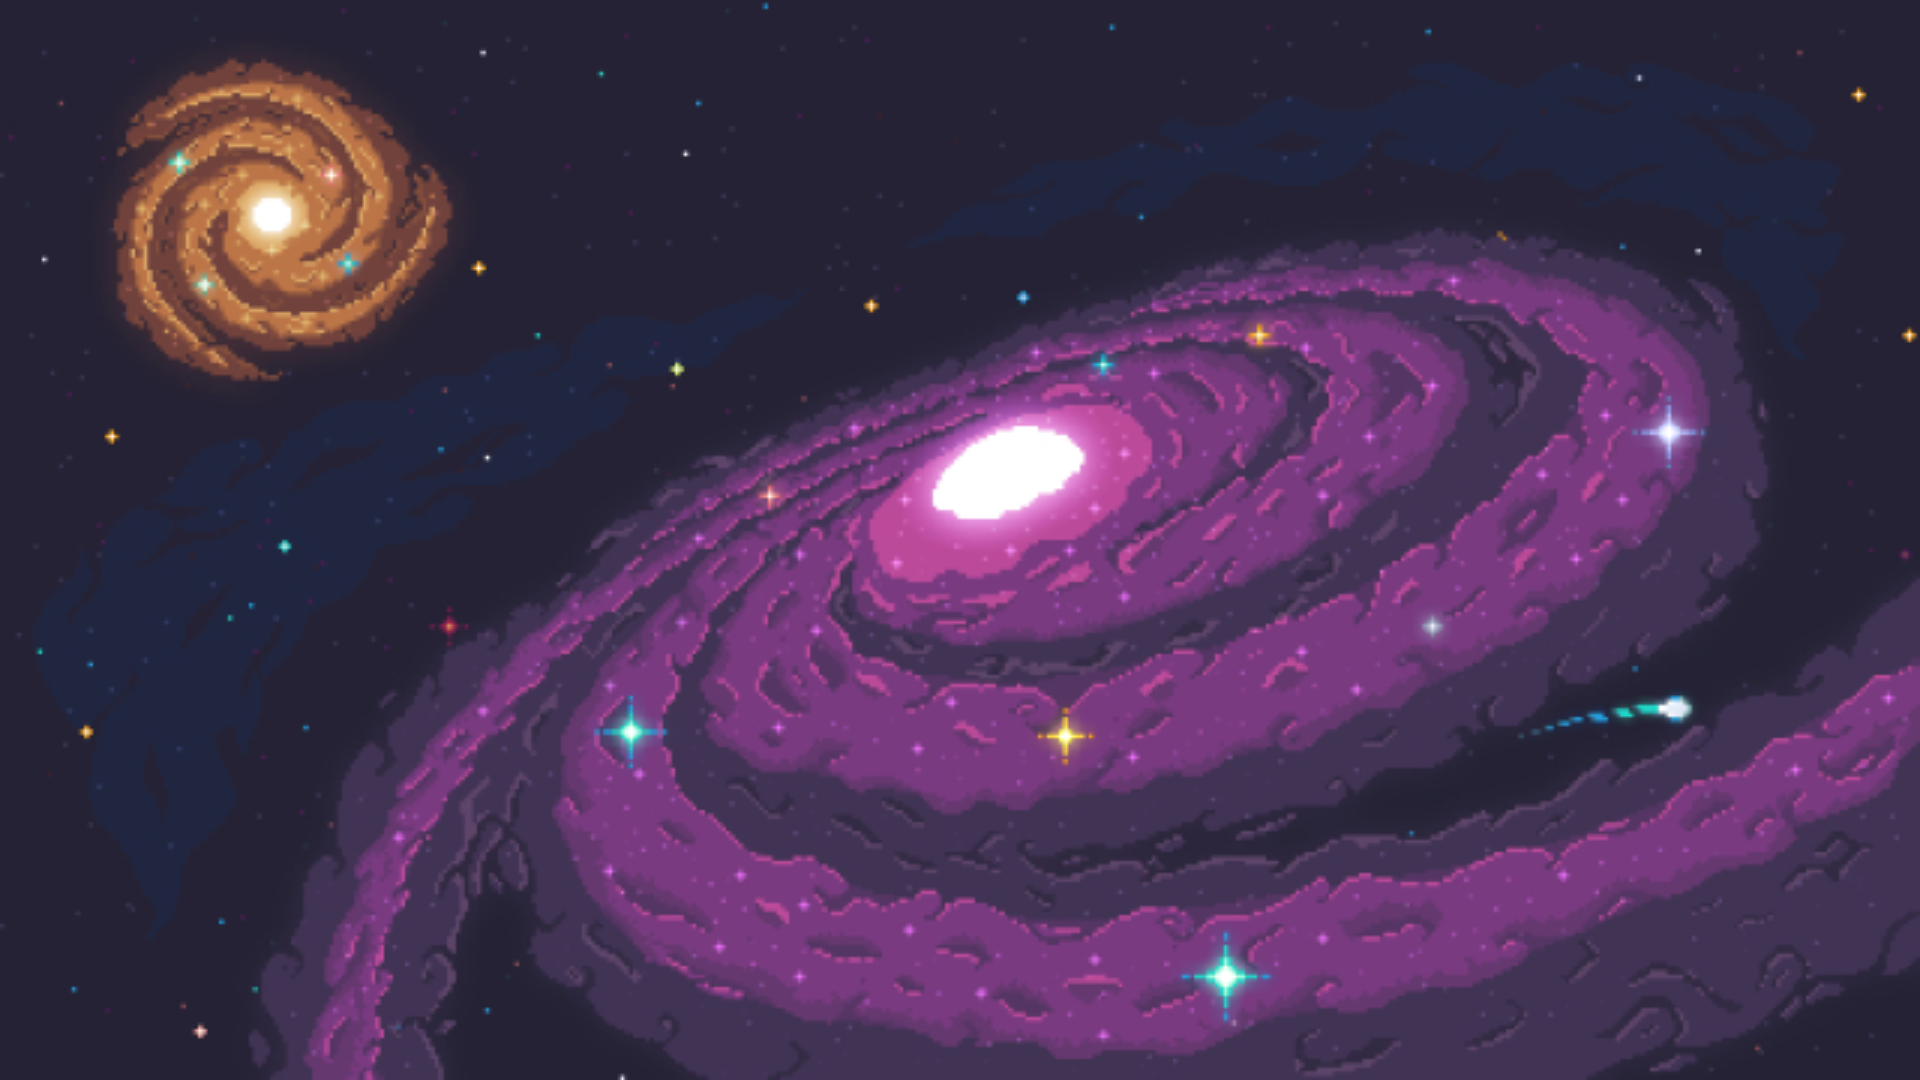

In [12]:
img2 = target[:,:,::-1]
display(Image.fromarray(img2))

In [15]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

print(psnr(target, inference))

28.35745416116829
